In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import subprocess
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

# スライド用画像作成

In [3]:
out_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171114'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

## 旋回中心と温度分布の混合

In [15]:
import cv2

In [4]:
vmem = RawCam('/mnt/recordings/SimulationResults/2D/20171108-48/', cam_type='numpy',
           image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem_temp = VmemMap(vmem)
vmem.cmap = vmem_temp.cmap

In [7]:
pmap = PhaseMap(vmem, shrink=2)
pvmap = PhaseVarianceMap(pmap, size=3)

In [9]:
temp = np.load('/mnt/recordings/SimulationResults/2D/20171108-48/cell_0100/temp.npy').reshape((200,200))

In [13]:
pvmap.data[100, :, :].shape

(100, 100)

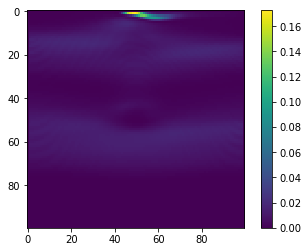

In [48]:
plt.imshow(pvmap.data[485,:,:])
plt.colorbar()

Text(4,8,u'0001 (ms)')

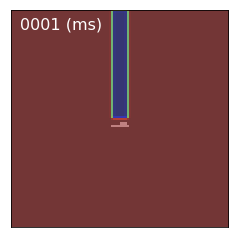

In [32]:
plt.imshow(cv2.resize(temp, (100,100)), cmap='jet', alpha=0.7)
plt.imshow((pvmap.data[100, :, :]>0.4), cmap=pvmap.cmap, alpha=0.3)
plt.xticks([])
plt.yticks([])
plt.text(4,8,"%s (ms)"% "{0:04d}".format(1),fontsize=16, color='white')

In [42]:
plt.close()
for i in range(1000):
    num = "{0:04d}".format(i)
    temp = np.load('/mnt/recordings/SimulationResults/2D/20171108-48/cell_%s/temp.npy' % num).reshape((200,200))
    plt.imshow(temp, cmap='jet', alpha=0.5, vmin=302, vmax=310)
    plt.imshow((cv2.resize(pvmap.data[i, :, :]>0.3), (200,200)), cmap=pvmap.cmap, alpha=0.5, vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.text(6,16,"%s (ms)"% num,fontsize=16, color='white')
    
    plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171114/pvmap_temp/20171108-48/%s.png' % num, dpi=300)
    plt.close()

In [43]:
subprocess.call('ffmpeg -r 50 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171114/pvmap_temp/20171108-48/%04d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171114/pvmap_temp/20171108-48.mp4"', shell=True)

0